In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from tqdm import tqdm_notebook as tqdm
import string

%matplotlib inline

plt.style.use('seaborn-deep')
plt.rcParams['figure.figsize'] = (12,8)

In [2]:
# def gen_cd(x):
#     x = x[x.find('=\t')+2:]
#     x = x[:x.find(' ')]
#     return float(x)
# list(map(gen_cd, tmp))[::-1]

In [3]:
df_train = pd.read_csv('train.tsv', sep='\t', index_col=0)
df_test = pd.read_csv('test_nolabel.tsv', sep='\t', index_col=0)

In [4]:
with open('lemmatized_train_description.csv', 'r') as f:
    df_train['lem_desc_text'] = f.read().split('\n')[:-1]
with open('lemmatized_train_name.csv', 'r') as f:
    df_train['lem_name_text'] = f.read().split('\n')[:-1]
with open('lemmatized_test_description.csv', 'r') as f:
    df_test['lem_desc_text'] = f.read().split('\n')[:-1]
with open('lemmatized_test_name.csv', 'r') as f:
    df_test['lem_name_text'] = f.read().split('\n')[:-1]

In [5]:
# usd_vals = (np.array(usd_vals) - (np.array([0, *usd_vals[:-1]]) + np.array([*[0]*2, *usd_vals[:-2]]))/3)
# usd_vals[0] = 0

In [6]:
usd_vals = [57.7656, 57.5336, 57.1698, 57.0156, 56.8703, 56.8703, 56.974, 57.1265, 56.9048, 57.0542, 56.5354, 56.6214, 56.643, 56.5815, 56.34, 56.4806, 56.8843, 56.5337, 56.7449, 56.7449, 56.6259, 56.489, 56.3822, 56.1906, 55.9177, 56.2409, 56.2409, 56.2429, 56.3144, 56.3559, 56.1484, 55.9797, 56.5647, 56.5511, 56.4084, 57.3221, 56.8827, 57.8441, 58.3203, 58.3658, 58.3661, 58.3715, 57.7847, 57.6521, 56.7294, 56.423, 56.4096, 56.4099, 56.48, 56.4139, 56.5566, 56.7465, 56.5016, 56.3072, 56.306, 56.3565, 55.6619, 56.2542, 56.3557, 56.8226, 56.815, 56.8139, 57.013, 56.4534, 56.9132, 56.8434, 57.0927, 56.6576, 56.6576, 56.6927, 56.8929, 57.081, 57.0737, 57.4471, 57.5206, 57.5206, 57.4934, 57.772, 57.5473, 56.8776, 57.3431, 57.2337, 57.2334, 57.189, 57.2315, 57.3856, 57.7538, 57.2778, 57.3279, 57.1326, 57.1511, 57.4729, 57.6332, 57.5481, 57.6937, 57.9894, 57.9908, 58.106, 60.6521, 62.9678, 62.4445, 62.0285, 62.0237, 62.0237, 62.0361, 61.2457, 61.565, 60.8706, 60.9898, 61.3869, 61.3847, 61.4117, 61.8333, 61.5531, 62.4188, 62.7461, 62.1261, 62.1261, 62.5812, 62.9783, 63.6422, 63.9971, 63.0015, 62.9573, 62.9568, 62.7357, 62.9125, 63.3502, 63.061, 61.7336, 61.895, 61.9063, 61.91, 61.8591, 62.2915, 61.6437, 62.1583, 62.322, 62.3199, 62.3846, 61.5664, 61.2374, 61.3206, 61.5515, 62.2049, 62.2052, 62.1689, 62.3258, 62.8688, 62.1446, 62.321, 62.2059, 62.2062, 62.2078, 62.0581, 62.1039, 61.6692, 62.4126, 62.3296, 62.328, 62.4166, 62.8045, 63.1639, 62.4227, 62.5148, 63.1607, 63.1607, 63.0758, 63.4033, 63.8622, 63.5858, 63.5931, 62.9759, 62.9759, 63.0114, 62.7974, 63.0976, 63.1543, 62.9445, 62.808, 62.8058, 63.0883, 63.6822, 63.145, 63.3743, 63.2205, 62.9448, 62.9446, 62.9293, 62.542, 61.8017, 62.3795, 62.2641, 62.5882, 62.5872, 62.5012, 62.3458, 62.6342, 63.0842, 63.6346, 63.4719, 63.4721, 63.4282, 63.0742, 63.3331, 62.8282, 62.9537, 62.7839, 62.7839, 62.7306, 62.2495, 62.4592, 62.9988, 63.3367, 63.342, 63.342, 63.3763, 63.6729, 63.5166, 65.5877, 66.545, 67.6909, 67.6909, 67.8494, 67.6627, 66.6071, 67.3317, 66.8639, 67.0075, 67.0075, 67.0829, 67.0014, 67.2166, 68.0498, 68.2972, 67.0932, 67.0932, 67.093, 67.4703, 67.8484, 67.9424, 68.2452, 67.516, 67.516, 67.578, 67.9144, 68.2069, 68.082, 69.203, 69.9101, 69.9111, 69.7331, 70.5667, 69.4031, 68.9207, 68.3217, 68.0369, 68.0369, 68.0304, 68.0699, 67.3874, 66.748, 66.3572, 66.4793, 66.8534, 66.5978, 65.9817, 65.7536, 65.919, 65.5561, 65.6148, 65.6148, 65.6085, 64.9926, 65.4259, 65.9212, 66.8861, 66.6299, 66.6299, 66.6042, 66.6357, 66.2462, 66.9351, 66.2117, 66.065, 66.065, 65.9475, 65.5768, 65.3444, 65.5591, 65.8092, 65.4973, 65.4973, 65.5465, 65.2115, 65.5191, 65.5916, 65.5776, 65.69, 65.692, 65.685, 65.8128, 65.5094, 65.7482, 65.6843, 66.1583, 66.1583, 66.0966, 66.0613, 66.0585, 66.1885, 66.9001, 67.92, 67.9212, 67.8918, 67.8571, 67.9724, 67.1006, 65.8962, 65.9831, 65.9831, 66.021, 65.5917, 66.0928, 65.6972, 65.6014, 66.2126, 66.2125, 66.5587, 67.1477, 67.0573, 66.9516, 66.1927, 67.0572, 67.0545, 66.7415, 66.5852, 66.8281, 66.5218, 66.7492, 66.4191, 66.4191, 66.4347, 66.6824, 66.4127, 66.4137, 66.3483, 66.8249, 66.8249, 66.681, 66.654, 67.4666, 67.4527, 68.2993, 68.89, 68.8903, 68.7537, 68.6487, 68.7465, 68.7911, 69.591, 69.5009, 69.5009, 69.5234, 69.2062]
dates = sorted(set(df_train['date_created']) | set(df_test['date_created']))
date2usd = dict(zip(dates, usd_vals))
date2week = dict(zip(dates, np.arange(365) % 7))
# usd_m = [56.4981, 56.8067, 57.0636, 60.7699, 62.2309, 62.7685, 62.8619, 66.0764, 67.6661, 65.8545, 66.3557, 67.3353]

In [7]:
df_train['usd'] = df_train['date_created'].apply(lambda x: date2usd[x])
df_test['usd'] = df_test['date_created'].apply(lambda x: date2usd[x])
df_train['week'] = df_train['date_created'].apply(lambda x: date2week[x])
df_test['week'] = df_test['date_created'].apply(lambda x: date2week[x])
# df_train['usd_m'] = df_train['date_created'].apply(lambda x: usd_m[int(x[5:7])-1])
# df_test['usd_m'] = df_test['date_created'].apply(lambda x: usd_m[int(x[5:7])-1])

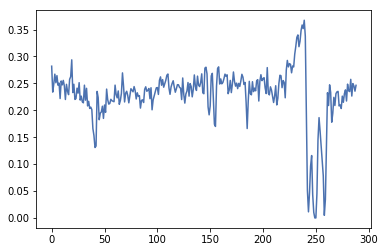

In [8]:
y = df_train.groupby('date_created')['sold_fast'].apply(np.average).tolist()
x = np.arange(len(y))
plt.plot(x, y)

In [10]:
prop_col = []
for i, item_prop in enumerate(df_train['properties'].values):
    prop_text = []
    for text in item_prop.split('}')[:-1]:
        props = text[text.find('{'):].split(',')
        name = props[1][props[1].find(': '):].translate(str.maketrans('','',string.punctuation))
        val = props[2][props[2].find(': '):].translate(str.maketrans('','',string.punctuation))
        if 'Нет' not in val:
#             prop_text.append(name)
            if 'Есть' not in val:
                prop_text.append(val)
    prop_col.append(' '.join(prop_text))
df_train['prop_text'] = prop_col

prop_col = []
for i, item_prop in enumerate(df_test['properties'].values):
    prop_text = []
    for text in item_prop.split('}')[:-1]:
        props = text[text.find('{'):].split(',')
        name = props[1][props[1].find(': '):].translate(str.maketrans('','',string.punctuation))
        val = props[2][props[2].find(': '):].translate(str.maketrans('','',string.punctuation))
        if 'Нет' not in val:
#             prop_text.append(name)
            if 'Есть' not in val:
                prop_text.append(val)
    prop_col.append(' '.join(prop_text))
df_test['prop_text'] = prop_col

In [11]:
df_train.head()

,category_id,city,date_created,delivery_available,desc_text,img_num,lat,long,name_text,owner_id,...,properties,region,sold_mode,subcategory_id,sold_fast,lem_desc_text,lem_name_text,usd,week,prop_text
1,4,Краснодар,2018-10-08,False,"Продаю стол раскладной, деревянный, советский ...",3,45.0686,38.9518,Стол,4ce583fe8231a0cc4a3c7d241c7d0289,...,"[{'slug_id': 'stoly_stulya_tip', 'slug_name': ...",Краснодарский край,1,410,1,продавать стол раскладной деревянный советский...,стол,66.6357,0,Столы
2,4,Тюмень,2018-06-18,False,"Тарелки глубокие 6 шт. Блюдца, чашки по 6 шт. ...",2,57.1840,65.5674,Посуда,e58be2c8f143c17246dc2243b5d3b98f,...,"[{'slug_id': 'dom_dacha_posuda_tip', 'slug_nam...",Тюменская область,1,405,0,тарелка глубокий 6 шт блюдце чашка 6 шт весь р...,посуда,63.4033,0,Тарелки
4,9,Омск,2018-07-31,True,"Новый,с этикеткой. Размер L. Не подошёл по раз...",1,54.9889,73.4312,Костюм,51b408796027214232532b7e478e2159,...,[{'slug_id': 'zhenskaya_odezhda_pidzhaki_kosty...,Омская область,1,908,0,новый этикетка размер l подойти размер маломер...,костюм,62.4592,1,Костюмы с юбкой 4648 L
6,3,Санкт-Петербург,2018-04-17,False,"Складывается тростью, все колеса вниз. Сплошна...",4,59.9590,30.4877,Коляска,6544b83acbbf04439a7ba983093cafb4,...,"[{'slug_id': 'waggon_type', 'slug_name': 'Тип'...",Ленинградская область,1,312,0,складываться трость весь колесо вниз сплошной ...,коляска,61.5650,1,Прогулочная До 3 лет
10,5,Москва,2018-02-09,False,"Неразлучники, птичкам по 1,5 года. Продаю с бо...",2,55.6473,37.4118,Волнистые попугаи,ea575e28daf1f47bfce63015cd3ce5cf,...,[],Московская область,1,504,0,неразлучник птичка 1 5 год продавать большой к...,волнистый попугай,58.3658,4,


In [12]:
# df_train = df_train.sort_values(by=['date_created'])

In [13]:
X = df_train.drop(['sold_fast', 'properties', 'product_id', 'owner_id'], axis=1)
y = df_train['sold_fast']

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=42, shuffle=False)

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

# name_text = X_train['name_text'].values
# vectorizer_name_text = TfidfVectorizer(max_features=1000, decode_error='ignore')
# vectorizer_name_text.fit(name_text)

# desc_text = (X_train['desc_text'] + ' ' + X_train['prop_text']).values
# vectorizer_desc_text = TfidfVectorizer(max_features=1000, decode_error='ignore')
# vectorizer_desc_text.fit(desc_text)

name_text = X_train['name_text'].values
vectorizer_name_text = TfidfVectorizer(max_features=1000, decode_error='ignore')
vectorizer_name_text.fit(name_text)

desc_text = (X_train['desc_text'] + ' ' + X_train['prop_text']).values
vectorizer_desc_text = TfidfVectorizer(max_features=1000, decode_error='ignore')
vectorizer_desc_text.fit(desc_text)

TfidfVectorizer(analyzer='word', binary=False, decode_error='ignore',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=1000, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer, OneHotEncoder
onehot_preprocess = ColumnTransformer([("dummy_col", OneHotEncoder(
    handle_unknown='ignore',
    sparse=False,
    categories=[
        sorted(set(X_train['region']) & set(df_test['region'])),
        sorted(set(X_train['category_id']) & set(df_test['category_id'])),
        sorted(set(X_train['subcategory_id']) & set(df_test['subcategory_id'])),
        sorted(set(X_train['sold_mode']) & set(df_test['sold_mode'])),
        sorted(set(X_train['product_type']) & set(df_test['product_type']))
    ]), ['region', 'category_id', 'subcategory_id', 'sold_mode', 'product_type'])])

onehot_preprocess.fit(X_train)

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('dummy_col', OneHotEncoder(categorical_features=None,
       categories=[['Адыгея', 'Алтайский край', 'Амурская область', 'Архангельская область', 'Астраханская область', 'Башкортостан', 'Белгородская область', 'Брянская область', 'Владимирская область', 'Волгоградская область', 'Воло...lues=None, sparse=False), ['region', 'category_id', 'subcategory_id', 'sold_mode', 'product_type'])])

In [24]:
from scipy.sparse import hstack

def preprocessing(data):
    
    x1 = data[[
#         'is_free', 'is_not_used', 'is_broken', 'is_good', 'is_price_variable', 'is_cheap', 'is_other_reasons', 
               'week',
               'category_id', 'lat', 'long', 'price', 'product_type', 'sold_mode', 'subcategory_id', 'img_num']].values
    x3 = data[['payment_available', 'delivery_available']].values * 1.
    
    x_new = onehot_preprocess.transform(data)
    x1000 = vectorizer_name_text.transform(data['name_text']).toarray()
    x1001 = vectorizer_desc_text.transform(data['desc_text'] + ' ' + data['prop_text']).toarray()
    
    X = np.concatenate([x1, x3, x1000, x1001, x_new], axis=1)
    
    return X

In [25]:
# def date2ymd(date):
#     date_plitted = date.split('-')
#     year = date_plitted[0]
#     month = date_plitted[1]
#     day = date_plitted[2]
#     return int(month + day)


# def preprocessing(data):
    
#     x1 = data[['lat', 'long', 'price', 'sold_mode', 'img_num']].values
#     x2 = np.array([date2ymd(i) for i in data['date_created']]).reshape(-1,1)
#     x3 = data[['payment_available', 'delivery_available']].values * 1.
    
#     x22 = (data['price'].values * data['product_type'].values).reshape(-1,1)
#     x23 = (data['sold_mode'].values * data['subcategory_id'].values).reshape(-1,1)
#     x24 = (data['sold_mode'].values * data['price'].values).reshape(-1,1)
    
#     x1000 = vectorizer_name_text.transform(data['name_text']).toarray()
#     x1001 = vectorizer_desc_text.transform(data['desc_text']).toarray()
#     x1002 = vectorizer_prop_text.transform(data['prop_text']).toarray()
    
#     x_new = onehot_preprocess.transform(data)
    
    
#     X = np.concatenate([x1, x2, x22, x23, x24, x3, x1000, x1001, x1002, x_new], axis=1)
    
#     return X

In [26]:
# X_train = preprocessing(X_train)
# X_val = preprocessing(X_val)
X = preprocessing(X)

In [27]:
# X_train.shape, X_val.shape
X.shape

(351281, 2390)

In [28]:
# %%time
# n = 5
# step = X_train.shape[0] // n
# clfs = []
# for split in np.arange(0, X_train.shape[0], step).astype(int):
#     print('__________', vstack([X_train[:split], X_train[split+step:]]).shape, np.concatenate([y_train.values[:split], y_train.values[split+step:]]).shape)
    
#     clf = XGBClassifier(n_estimators=200, learning_rate=0.02, max_depth=8, n_jobs=3, colsample_bytree=0.7, scale_pos_weight=1.)
#     clf.fit(vstack([X_train[:split], X_train[split+step:]]), np.concatenate([y_train.values[:split], y_train.values[split+step:]]))
#     clfs.append(clf)

In [29]:
# from xgboost import XGBClassifier

# #clf = RandomForestClassifier(n_estimators=100, n_jobs=3, class_weight='balanced', min_samples_leaf=100)
# clf = XGBClassifier(n_estimators=200, learning_rate=0.02, max_depth=8, n_jobs=3, colsample_bytree=0.7, scale_pos_weight=1., verbosity=3)
# clf.fit(X_train, y_train)

In [30]:
from catboost import CatBoostClassifier

cb = CatBoostClassifier(learning_rate=0.1, iterations=2000, depth=4)
cb.fit(X, y)

0:	learn: 0.6614580	total: 595ms	remaining: 19m 50s
1:	learn: 0.6365297	total: 1.16s	remaining: 19m 18s
2:	learn: 0.6170427	total: 1.68s	remaining: 18m 41s
3:	learn: 0.6011980	total: 2.19s	remaining: 18m 10s
4:	learn: 0.5882367	total: 2.69s	remaining: 17m 54s
5:	learn: 0.5778060	total: 3.22s	remaining: 17m 50s
6:	learn: 0.5691778	total: 3.76s	remaining: 17m 50s
7:	learn: 0.5617806	total: 4.31s	remaining: 17m 52s
8:	learn: 0.5565909	total: 4.82s	remaining: 17m 46s
9:	learn: 0.5520694	total: 5.37s	remaining: 17m 49s
10:	learn: 0.5481633	total: 5.93s	remaining: 17m 51s
11:	learn: 0.5449177	total: 6.49s	remaining: 17m 55s
12:	learn: 0.5426435	total: 7s	remaining: 17m 49s
13:	learn: 0.5404878	total: 7.54s	remaining: 17m 50s
14:	learn: 0.5388852	total: 8.09s	remaining: 17m 50s
15:	learn: 0.5374376	total: 8.64s	remaining: 17m 51s
16:	learn: 0.5362625	total: 9.18s	remaining: 17m 50s
17:	learn: 0.5352467	total: 9.71s	remaining: 17m 48s
18:	learn: 0.5344743	total: 10.2s	remaining: 17m 45s
19:	le

155:	learn: 0.5236965	total: 1m 26s	remaining: 17m 3s
156:	learn: 0.5236752	total: 1m 27s	remaining: 17m 6s
157:	learn: 0.5236507	total: 1m 28s	remaining: 17m 8s
158:	learn: 0.5236336	total: 1m 29s	remaining: 17m 10s
159:	learn: 0.5236082	total: 1m 29s	remaining: 17m 13s
160:	learn: 0.5235762	total: 1m 30s	remaining: 17m 16s
161:	learn: 0.5235417	total: 1m 31s	remaining: 17m 19s
162:	learn: 0.5235255	total: 1m 32s	remaining: 17m 21s
163:	learn: 0.5235058	total: 1m 33s	remaining: 17m 21s
164:	learn: 0.5234884	total: 1m 33s	remaining: 17m 20s
165:	learn: 0.5234694	total: 1m 34s	remaining: 17m 19s
166:	learn: 0.5234456	total: 1m 34s	remaining: 17m 17s
167:	learn: 0.5234218	total: 1m 35s	remaining: 17m 16s
168:	learn: 0.5233996	total: 1m 35s	remaining: 17m 15s
169:	learn: 0.5233776	total: 1m 36s	remaining: 17m 14s
170:	learn: 0.5233545	total: 1m 36s	remaining: 17m 13s
171:	learn: 0.5233372	total: 1m 37s	remaining: 17m 11s
172:	learn: 0.5233154	total: 1m 37s	remaining: 17m 10s
173:	learn: 0

306:	learn: 0.5209486	total: 2m 52s	remaining: 15m 50s
307:	learn: 0.5209394	total: 2m 53s	remaining: 15m 52s
308:	learn: 0.5209293	total: 2m 54s	remaining: 15m 55s
309:	learn: 0.5209160	total: 2m 55s	remaining: 15m 58s
310:	learn: 0.5209027	total: 2m 57s	remaining: 16m 1s
311:	learn: 0.5208909	total: 2m 58s	remaining: 16m 5s
312:	learn: 0.5208803	total: 2m 59s	remaining: 16m 8s
313:	learn: 0.5208596	total: 3m 1s	remaining: 16m 12s
314:	learn: 0.5208485	total: 3m 2s	remaining: 16m 14s
315:	learn: 0.5208431	total: 3m 3s	remaining: 16m 16s
316:	learn: 0.5208226	total: 3m 4s	remaining: 16m 18s
317:	learn: 0.5208092	total: 3m 5s	remaining: 16m 20s
318:	learn: 0.5208040	total: 3m 6s	remaining: 16m 22s
319:	learn: 0.5207953	total: 3m 7s	remaining: 16m 24s
320:	learn: 0.5207825	total: 3m 8s	remaining: 16m 26s
321:	learn: 0.5207731	total: 3m 9s	remaining: 16m 28s
322:	learn: 0.5207585	total: 3m 10s	remaining: 16m 30s
323:	learn: 0.5207474	total: 3m 11s	remaining: 16m 32s
324:	learn: 0.5207318	

457:	learn: 0.5191632	total: 4m 27s	remaining: 15m 1s
458:	learn: 0.5191484	total: 4m 28s	remaining: 15m
459:	learn: 0.5191397	total: 4m 28s	remaining: 14m 59s
460:	learn: 0.5191339	total: 4m 29s	remaining: 14m 58s
461:	learn: 0.5191298	total: 4m 29s	remaining: 14m 57s
462:	learn: 0.5191177	total: 4m 30s	remaining: 14m 56s
463:	learn: 0.5191101	total: 4m 30s	remaining: 14m 55s
464:	learn: 0.5191035	total: 4m 31s	remaining: 14m 55s
465:	learn: 0.5190872	total: 4m 31s	remaining: 14m 54s
466:	learn: 0.5190808	total: 4m 32s	remaining: 14m 53s
467:	learn: 0.5190734	total: 4m 32s	remaining: 14m 52s
468:	learn: 0.5190604	total: 4m 33s	remaining: 14m 51s
469:	learn: 0.5190508	total: 4m 33s	remaining: 14m 50s
470:	learn: 0.5190414	total: 4m 34s	remaining: 14m 49s
471:	learn: 0.5190318	total: 4m 34s	remaining: 14m 48s
472:	learn: 0.5190220	total: 4m 35s	remaining: 14m 47s
473:	learn: 0.5190127	total: 4m 35s	remaining: 14m 46s
474:	learn: 0.5190064	total: 4m 35s	remaining: 14m 45s
475:	learn: 0.5

607:	learn: 0.5176741	total: 5m 43s	remaining: 13m 5s
608:	learn: 0.5176654	total: 5m 43s	remaining: 13m 5s
609:	learn: 0.5176536	total: 5m 44s	remaining: 13m 4s
610:	learn: 0.5176451	total: 5m 44s	remaining: 13m 3s
611:	learn: 0.5176381	total: 5m 45s	remaining: 13m 2s
612:	learn: 0.5176210	total: 5m 45s	remaining: 13m 2s
613:	learn: 0.5176157	total: 5m 46s	remaining: 13m 1s
614:	learn: 0.5176078	total: 5m 46s	remaining: 13m
615:	learn: 0.5175989	total: 5m 47s	remaining: 12m 59s
616:	learn: 0.5175928	total: 5m 47s	remaining: 12m 59s
617:	learn: 0.5175836	total: 5m 48s	remaining: 12m 58s
618:	learn: 0.5175737	total: 5m 48s	remaining: 12m 57s
619:	learn: 0.5175684	total: 5m 49s	remaining: 12m 56s
620:	learn: 0.5175630	total: 5m 49s	remaining: 12m 56s
621:	learn: 0.5175519	total: 5m 50s	remaining: 12m 55s
622:	learn: 0.5175424	total: 5m 50s	remaining: 12m 54s
623:	learn: 0.5175340	total: 5m 51s	remaining: 12m 54s
624:	learn: 0.5175272	total: 5m 51s	remaining: 12m 53s
625:	learn: 0.5175163

757:	learn: 0.5163916	total: 6m 58s	remaining: 11m 26s
758:	learn: 0.5163815	total: 6m 59s	remaining: 11m 25s
759:	learn: 0.5163734	total: 6m 59s	remaining: 11m 24s
760:	learn: 0.5163622	total: 7m	remaining: 11m 24s
761:	learn: 0.5163496	total: 7m	remaining: 11m 23s
762:	learn: 0.5163432	total: 7m 1s	remaining: 11m 22s
763:	learn: 0.5163364	total: 7m 1s	remaining: 11m 22s
764:	learn: 0.5163274	total: 7m 2s	remaining: 11m 21s
765:	learn: 0.5163236	total: 7m 2s	remaining: 11m 20s
766:	learn: 0.5163178	total: 7m 3s	remaining: 11m 20s
767:	learn: 0.5163098	total: 7m 3s	remaining: 11m 19s
768:	learn: 0.5163049	total: 7m 4s	remaining: 11m 18s
769:	learn: 0.5162973	total: 7m 4s	remaining: 11m 18s
770:	learn: 0.5162879	total: 7m 5s	remaining: 11m 17s
771:	learn: 0.5162772	total: 7m 5s	remaining: 11m 17s
772:	learn: 0.5162705	total: 7m 6s	remaining: 11m 16s
773:	learn: 0.5162651	total: 7m 6s	remaining: 11m 15s
774:	learn: 0.5162566	total: 7m 7s	remaining: 11m 15s
775:	learn: 0.5162523	total: 7m

908:	learn: 0.5152361	total: 8m 14s	remaining: 9m 53s
909:	learn: 0.5152288	total: 8m 14s	remaining: 9m 52s
910:	learn: 0.5152227	total: 8m 15s	remaining: 9m 52s
911:	learn: 0.5152164	total: 8m 15s	remaining: 9m 51s
912:	learn: 0.5152087	total: 8m 16s	remaining: 9m 51s
913:	learn: 0.5152021	total: 8m 16s	remaining: 9m 50s
914:	learn: 0.5151949	total: 8m 17s	remaining: 9m 49s
915:	learn: 0.5151886	total: 8m 17s	remaining: 9m 49s
916:	learn: 0.5151816	total: 8m 18s	remaining: 9m 48s
917:	learn: 0.5151769	total: 8m 18s	remaining: 9m 47s
918:	learn: 0.5151706	total: 8m 19s	remaining: 9m 47s
919:	learn: 0.5151649	total: 8m 19s	remaining: 9m 46s
920:	learn: 0.5151607	total: 8m 20s	remaining: 9m 46s
921:	learn: 0.5151574	total: 8m 20s	remaining: 9m 45s
922:	learn: 0.5151521	total: 8m 21s	remaining: 9m 44s
923:	learn: 0.5151408	total: 8m 21s	remaining: 9m 44s
924:	learn: 0.5151312	total: 8m 22s	remaining: 9m 43s
925:	learn: 0.5151278	total: 8m 22s	remaining: 9m 42s
926:	learn: 0.5151199	total:

1060:	learn: 0.5141229	total: 9m 29s	remaining: 8m 24s
1061:	learn: 0.5141180	total: 9m 30s	remaining: 8m 23s
1062:	learn: 0.5141139	total: 9m 30s	remaining: 8m 23s
1063:	learn: 0.5141086	total: 9m 31s	remaining: 8m 22s
1064:	learn: 0.5141000	total: 9m 31s	remaining: 8m 22s
1065:	learn: 0.5140919	total: 9m 32s	remaining: 8m 21s
1066:	learn: 0.5140834	total: 9m 32s	remaining: 8m 21s
1067:	learn: 0.5140745	total: 9m 33s	remaining: 8m 20s
1068:	learn: 0.5140656	total: 9m 33s	remaining: 8m 19s
1069:	learn: 0.5140506	total: 9m 34s	remaining: 8m 19s
1070:	learn: 0.5140400	total: 9m 35s	remaining: 8m 18s
1071:	learn: 0.5140311	total: 9m 35s	remaining: 8m 18s
1072:	learn: 0.5140259	total: 9m 35s	remaining: 8m 17s
1073:	learn: 0.5140198	total: 9m 36s	remaining: 8m 17s
1074:	learn: 0.5140131	total: 9m 37s	remaining: 8m 16s
1075:	learn: 0.5140039	total: 9m 37s	remaining: 8m 16s
1076:	learn: 0.5139968	total: 9m 38s	remaining: 8m 15s
1077:	learn: 0.5139912	total: 9m 38s	remaining: 8m 15s
1078:	lear

1209:	learn: 0.5131377	total: 10m 45s	remaining: 7m 1s
1210:	learn: 0.5131285	total: 10m 45s	remaining: 7m
1211:	learn: 0.5131227	total: 10m 46s	remaining: 7m
1212:	learn: 0.5131191	total: 10m 46s	remaining: 6m 59s
1213:	learn: 0.5131151	total: 10m 47s	remaining: 6m 59s
1214:	learn: 0.5131089	total: 10m 47s	remaining: 6m 58s
1215:	learn: 0.5131037	total: 10m 48s	remaining: 6m 57s
1216:	learn: 0.5130982	total: 10m 48s	remaining: 6m 57s
1217:	learn: 0.5130947	total: 10m 49s	remaining: 6m 56s
1218:	learn: 0.5130865	total: 10m 49s	remaining: 6m 56s
1219:	learn: 0.5130789	total: 10m 50s	remaining: 6m 55s
1220:	learn: 0.5130722	total: 10m 50s	remaining: 6m 55s
1221:	learn: 0.5130676	total: 10m 51s	remaining: 6m 54s
1222:	learn: 0.5130605	total: 10m 51s	remaining: 6m 53s
1223:	learn: 0.5130565	total: 10m 52s	remaining: 6m 53s
1224:	learn: 0.5130505	total: 10m 52s	remaining: 6m 52s
1225:	learn: 0.5130446	total: 10m 53s	remaining: 6m 52s
1226:	learn: 0.5130404	total: 10m 53s	remaining: 6m 51s
1

1357:	learn: 0.5122034	total: 11m 59s	remaining: 5m 40s
1358:	learn: 0.5121950	total: 12m	remaining: 5m 39s
1359:	learn: 0.5121852	total: 12m	remaining: 5m 39s
1360:	learn: 0.5121824	total: 12m 1s	remaining: 5m 38s
1361:	learn: 0.5121740	total: 12m 1s	remaining: 5m 38s
1362:	learn: 0.5121653	total: 12m 2s	remaining: 5m 37s
1363:	learn: 0.5121584	total: 12m 2s	remaining: 5m 36s
1364:	learn: 0.5121518	total: 12m 3s	remaining: 5m 36s
1365:	learn: 0.5121442	total: 12m 3s	remaining: 5m 35s
1366:	learn: 0.5121343	total: 12m 4s	remaining: 5m 35s
1367:	learn: 0.5121319	total: 12m 4s	remaining: 5m 34s
1368:	learn: 0.5121290	total: 12m 5s	remaining: 5m 34s
1369:	learn: 0.5121234	total: 12m 5s	remaining: 5m 33s
1370:	learn: 0.5121146	total: 12m 6s	remaining: 5m 33s
1371:	learn: 0.5121098	total: 12m 6s	remaining: 5m 32s
1372:	learn: 0.5121040	total: 12m 6s	remaining: 5m 31s
1373:	learn: 0.5121006	total: 12m 7s	remaining: 5m 31s
1374:	learn: 0.5120931	total: 12m 7s	remaining: 5m 30s
1375:	learn: 0.

1505:	learn: 0.5112883	total: 13m 13s	remaining: 4m 20s
1506:	learn: 0.5112828	total: 13m 14s	remaining: 4m 19s
1507:	learn: 0.5112798	total: 13m 14s	remaining: 4m 19s
1508:	learn: 0.5112774	total: 13m 14s	remaining: 4m 18s
1509:	learn: 0.5112696	total: 13m 15s	remaining: 4m 18s
1510:	learn: 0.5112614	total: 13m 15s	remaining: 4m 17s
1511:	learn: 0.5112540	total: 13m 16s	remaining: 4m 17s
1512:	learn: 0.5112491	total: 13m 17s	remaining: 4m 16s
1513:	learn: 0.5112384	total: 13m 17s	remaining: 4m 16s
1514:	learn: 0.5112358	total: 13m 18s	remaining: 4m 15s
1515:	learn: 0.5112283	total: 13m 18s	remaining: 4m 14s
1516:	learn: 0.5112239	total: 13m 19s	remaining: 4m 14s
1517:	learn: 0.5112210	total: 13m 19s	remaining: 4m 13s
1518:	learn: 0.5112118	total: 13m 20s	remaining: 4m 13s
1519:	learn: 0.5112056	total: 13m 20s	remaining: 4m 12s
1520:	learn: 0.5112030	total: 13m 21s	remaining: 4m 12s
1521:	learn: 0.5111980	total: 13m 21s	remaining: 4m 11s
1522:	learn: 0.5111935	total: 13m 22s	remaining:

1653:	learn: 0.5104097	total: 14m 28s	remaining: 3m 1s
1654:	learn: 0.5104020	total: 14m 28s	remaining: 3m 1s
1655:	learn: 0.5103907	total: 14m 29s	remaining: 3m
1656:	learn: 0.5103874	total: 14m 29s	remaining: 3m
1657:	learn: 0.5103818	total: 14m 30s	remaining: 2m 59s
1658:	learn: 0.5103788	total: 14m 30s	remaining: 2m 58s
1659:	learn: 0.5103687	total: 14m 31s	remaining: 2m 58s
1660:	learn: 0.5103630	total: 14m 31s	remaining: 2m 57s
1661:	learn: 0.5103565	total: 14m 32s	remaining: 2m 57s
1662:	learn: 0.5103522	total: 14m 32s	remaining: 2m 56s
1663:	learn: 0.5103485	total: 14m 33s	remaining: 2m 56s
1664:	learn: 0.5103435	total: 14m 33s	remaining: 2m 55s
1665:	learn: 0.5103391	total: 14m 34s	remaining: 2m 55s
1666:	learn: 0.5103331	total: 14m 35s	remaining: 2m 54s
1667:	learn: 0.5103259	total: 14m 35s	remaining: 2m 54s
1668:	learn: 0.5103192	total: 14m 36s	remaining: 2m 53s
1669:	learn: 0.5103160	total: 14m 36s	remaining: 2m 53s
1670:	learn: 0.5103133	total: 14m 37s	remaining: 2m 52s
16

1801:	learn: 0.5094714	total: 15m 45s	remaining: 1m 43s
1802:	learn: 0.5094639	total: 15m 46s	remaining: 1m 43s
1803:	learn: 0.5094602	total: 15m 46s	remaining: 1m 42s
1804:	learn: 0.5094513	total: 15m 47s	remaining: 1m 42s
1805:	learn: 0.5094466	total: 15m 47s	remaining: 1m 41s
1806:	learn: 0.5094400	total: 15m 48s	remaining: 1m 41s
1807:	learn: 0.5094349	total: 15m 48s	remaining: 1m 40s
1808:	learn: 0.5094314	total: 15m 49s	remaining: 1m 40s
1809:	learn: 0.5094264	total: 15m 49s	remaining: 1m 39s
1810:	learn: 0.5094229	total: 15m 50s	remaining: 1m 39s
1811:	learn: 0.5094153	total: 15m 50s	remaining: 1m 38s
1812:	learn: 0.5094117	total: 15m 51s	remaining: 1m 38s
1813:	learn: 0.5094034	total: 15m 51s	remaining: 1m 37s
1814:	learn: 0.5093966	total: 15m 52s	remaining: 1m 37s
1815:	learn: 0.5093923	total: 15m 52s	remaining: 1m 36s
1816:	learn: 0.5093866	total: 15m 53s	remaining: 1m 36s
1817:	learn: 0.5093804	total: 15m 53s	remaining: 1m 35s
1818:	learn: 0.5093727	total: 15m 54s	remaining:

1950:	learn: 0.5085897	total: 17m 3s	remaining: 25.7s
1951:	learn: 0.5085860	total: 17m 4s	remaining: 25.2s
1952:	learn: 0.5085845	total: 17m 4s	remaining: 24.7s
1953:	learn: 0.5085767	total: 17m 5s	remaining: 24.1s
1954:	learn: 0.5085706	total: 17m 5s	remaining: 23.6s
1955:	learn: 0.5085629	total: 17m 6s	remaining: 23.1s
1956:	learn: 0.5085562	total: 17m 6s	remaining: 22.6s
1957:	learn: 0.5085506	total: 17m 7s	remaining: 22s
1958:	learn: 0.5085455	total: 17m 7s	remaining: 21.5s
1959:	learn: 0.5085392	total: 17m 8s	remaining: 21s
1960:	learn: 0.5085355	total: 17m 8s	remaining: 20.5s
1961:	learn: 0.5085313	total: 17m 9s	remaining: 19.9s
1962:	learn: 0.5085241	total: 17m 9s	remaining: 19.4s
1963:	learn: 0.5085170	total: 17m 10s	remaining: 18.9s
1964:	learn: 0.5085141	total: 17m 10s	remaining: 18.4s
1965:	learn: 0.5085072	total: 17m 11s	remaining: 17.8s
1966:	learn: 0.5085027	total: 17m 11s	remaining: 17.3s
1967:	learn: 0.5084958	total: 17m 12s	remaining: 16.8s
1968:	learn: 0.5084872	tota

In [31]:
# ids = list(map(lambda x: x[0], filter(lambda x: x[1] > 0, enumerate(cb.get_feature_importance()))))
# len(ids)

In [32]:
from sklearn.metrics import roc_auc_score

print("train AUC: ", roc_auc_score(y, cb.predict_proba(X)[:, 1]))
# print("val AUC: ", roc_auc_score(y_val, cb.predict_proba(X_val[:, ids].toarray())[:, 1]))

train AUC:  0.6691354478464621


In [ ]:
# train AUC:  0.6950715657470898
# val AUC:  0.62386950229294

# train AUC:  0.6932225229620128
# val AUC:  0.6249793135109288

In [50]:
# Test AUC:  0.6289922934899153
# Test AUC:  0.6294445887736262
# Test AUC:  0.6299592194176079
# Test AUC:  0.6287220133901563
# Test AUC:  0.6298864684093403 lem words

# train AUC:  0.6866320659076522
# val AUC:  0.633924980095857

# train AUC:  0.6675604288564749
# val AUC:  0.6205839575828358


# train AUC:  0.6823212589267231
# val AUC:  0.6327517870217287

# train AUC:  0.6827372814929975
# val AUC:  0.6331409742179044

# train AUC:  0.6680263511677833
# val AUC:  0.6326057211942954

# catboost
# train AUC:  0.6743079159410288
# val AUC:  0.6335272415698746

# train AUC:  0.710227111379572
# val AUC:  0.6364769719781576

# train AUC:  0.7079103418207023
# val AUC:  0.6337077917155796

In [51]:
ids = list(map(lambda x: x[0], filter(lambda x: x[1] > 0, enumerate(cb.get_feature_importance()))))
len(ids)

1540

In [52]:
from catboost import CatBoostClassifier

cb = CatBoostClassifier(learning_rate=0.1, iterations=2000, depth=4)
cb.fit(X_train[:, ids], y_train)

0:	learn: 0.6622549	total: 2.07s	remaining: 1h 8m 51s
1:	learn: 0.6376747	total: 3.49s	remaining: 58m 11s
2:	learn: 0.6175483	total: 5.83s	remaining: 1h 4m 43s
3:	learn: 0.6019405	total: 7.73s	remaining: 1h 4m 17s
4:	learn: 0.5888957	total: 9.97s	remaining: 1h 6m 19s
5:	learn: 0.5784001	total: 12.8s	remaining: 1h 11m 5s
6:	learn: 0.5703892	total: 14.2s	remaining: 1h 7m 35s
7:	learn: 0.5634180	total: 15.9s	remaining: 1h 5m 56s
8:	learn: 0.5579334	total: 18.2s	remaining: 1h 7m
9:	learn: 0.5535748	total: 19.6s	remaining: 1h 4m 57s
10:	learn: 0.5497730	total: 21.6s	remaining: 1h 5m 7s
11:	learn: 0.5467226	total: 23.2s	remaining: 1h 4m 10s
12:	learn: 0.5438277	total: 25.5s	remaining: 1h 4m 54s
13:	learn: 0.5416492	total: 29s	remaining: 1h 8m 29s
14:	learn: 0.5399259	total: 31.9s	remaining: 1h 10m 17s
15:	learn: 0.5385424	total: 33.6s	remaining: 1h 9m 30s
16:	learn: 0.5373905	total: 35.4s	remaining: 1h 8m 50s
17:	learn: 0.5363374	total: 37.4s	remaining: 1h 8m 41s
18:	learn: 0.5355749	total: 

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/ivan/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-52-b359287ad402>", line 4, in <module>
    cb.fit(X_train[:, ids], y_train)
  File "/home/ivan/anaconda3/lib/python3.7/site-packages/catboost/core.py", line 2803, in fit
    silent, early_stopping_rounds, save_snapshot, snapshot_file, snapshot_interval, init_model)
  File "/home/ivan/anaconda3/lib/python3.7/site-packages/catboost/core.py", line 1279, in _fit
    self._train(train_pool, eval_sets, params, allow_clear_pool, init_model)
  File "/home/ivan/anaconda3/lib/python3.7/site-packages/catboost/core.py", line 895, in _train
    self._object._train(train_pool, test_pool, params, allow_clear_pool, init_model._object if init_model else None)
  File "_catboost.pyx", line 2481, in _catboost._CatBoost._train
  File "_catboost.pyx", line 2537, in _catboost._CatBoost

KeyboardInterrupt: 

In [ ]:
print("train AUC: ", roc_auc_score(y_train, cb.predict_proba(X_train[:, ids])[:, 1]))
print("val AUC: ", roc_auc_score(y_val, cb.predict_proba(X_val[:, ids])[:, 1]))

In [24]:
# train AUC:  0.6678315916007982
# val AUC:  0.6203022830232632

# train AUC:  0.6711024815170343
# val AUC:  0.6203505869849973

# train AUC:  0.6815636853826605
# val AUC:  0.6329285600336014

In [22]:
X = preprocessing(X)

In [ ]:
from xgboost import XGBClassifier

#clf = RandomForestClassifier(n_estimators=100, n_jobs=3, class_weight='balanced', min_samples_leaf=100)
clf = XGBClassifier(n_estimators=200, learning_rate=0.02, max_depth=8, n_jobs=3, colsample_bytree=0.7, scale_pos_weight=1., verbosity=3)
clf.fit(X[:, ids], y)

In [37]:
X.shape

(351281, 2390)

In [ ]:
print("train AUC: ", roc_auc_score(y, clf.predict_proba(X)[:, 1]))

In [33]:
data_submit = pd.read_csv('test_nolabel.tsv', sep = '\t')

In [34]:
X_submit = preprocessing(df_test)

In [35]:
y_submit_pred = cb.predict_proba(X_submit)[:, 1]

In [36]:
product_id = df_test['product_id'].values
df_test = pd.DataFrame.from_dict({'product_id' : product_id, 'score' : y_submit_pred})
df_test.to_csv('./to_submit', sep = ',', index = False)